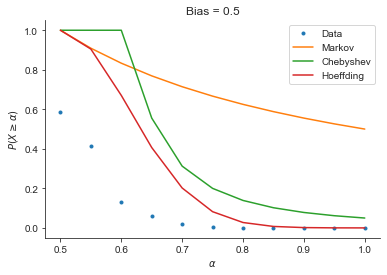

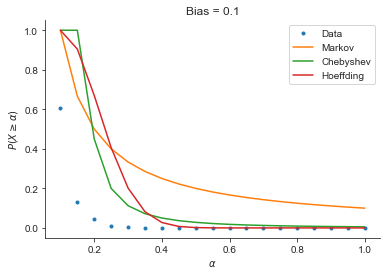

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")


def max1(l):
    return np.minimum(np.ones(len(l)),l)


def find_ineqs(rand,freqs,Var):
    bias = np.mean(np.mean(rand,axis = 1))
    
    
    # Markov
    ps = []
    for f in freqs:
        ps.append(np.sum(np.mean(rand,axis = 1) >= f)/len(rand))

    plt.plot(freqs,ps,'.',label = 'Data')
    
    E = bias
    plt.plot(freqs,max1(E/freqs),label = 'Markov')

    
    # Chebychev
    Cheb = Var/(rand.shape[1]*(-freqs + bias + 1e-11)**2)

    plt.plot(freqs,max1(Cheb),label = 'Chebyshev')

    
    # Hoeffding
    def hoeffding(freqs):
        return np.exp(-2*rand.shape[1]*freqs**2)

    Hoeff = hoeffding(-freqs + bias)
    plt.plot(freqs,max1(Hoeff),label = 'Hoeffding')

    plt.legend()
    plt.xlabel("$\\alpha$")
    plt.ylabel("$P(X\geq\\alpha)$")
    
    # plt.yscale("log")
    sns.despine()
    plt.show()
  

plt.figure()
plt.title("Bias = 0.5")
rand = np.random.choice([0,1],(int(1e6),20),p=(0.5,0.5))
alpha = np.arange(0.5,1.05,0.05)
find_ineqs(rand,alpha,0.5-0.25)


plt.figure()
plt.title("Bias = 0.1")
rand = np.random.choice([0,1],(int(1e6),20),p=(0.9,0.1))
alpha = np.arange(0.1,1.05,0.05)
find_ineqs(rand,alpha,0.1-0.01)